# Reading: Data Science Using Python and R

_Chapter 3 - Data Preparation_

Exploring dataset "bank_marketing_training"


**Project Object**

1. Learn about potiental customers and the characteristics of those who:
   - Choose to bank with us
   - Choose not to bank with us
2. Develop a profitable method of identifying likely positive responders to save move and time.
   - Quantify the expected profit from using these methods


### Install Libaries (only run once)


In [1]:
# !pip3 install pandas
# !pip3 install matplotlib
# !pip3 install scipy

  Using cached pandas-2.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.1-cp312-cp312-macosx_11_0_arm64.whl (11.3 MB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Using cached matplotlib-3.8.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached contourpy-1.2.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.50.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.2.0-cp312-cp312-macosx_11_0_

### Import Libraries


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

### Import Data


In [3]:
# Specify the file path
# Replace with your actual CSV filename
file_path = (
    "/Users/david/Documents/Coding/WGU/d206 - Data Cleaning/bank_marketing_training.csv"
)

# Read the CSV file into a DataFrame
bank_train = pd.read_csv(file_path)

# Print a preview of the DataFrame
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


## Data Preparation

- Adding index fields
- Changing misleading field values
- Reexpressing categorical data as numeric data
- Standardizing the numerica fields
- Identifying outlies


### Change misleading Field Values ('days_since_previous')


In [4]:
# change misleading field values ('days_since_previous')
bt_2 = bank_train.copy()
bt_2["days_since_previous"] = bt_2["days_since_previous"].replace({
                                                                  999: np.NaN})

bt_2["days_since_previous"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: days_since_previous, dtype: float64

### Set dataypes for columns


In [5]:
# set data types for fields
bt_2 = bt_2.astype(
    {
        "age": "int64",
        "job": "category",
        "marital": "category",
        "education": "category",
        "default": "category",
        "housing": "category",
        "loan": "category",
        "contact": "category",
        "month": "category",
        "day_of_week": "category",
        "duration": "int64",
        "campaign": "int64",
        "days_since_previous": "float64",  # problem field,contains 999 and NaN values
        "previous": "int64",
        "previous_outcome": "string",
        "emp.var.rate": "float64",
        "cons.price.idx": "float64",
        "cons.conf.idx": "float64",
        "euribor3m": "float64",
        "nr.employed": "float64",
        "response": "category",
    }
)
bt_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26874 entries, 0 to 26873
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  26874 non-null  int64   
 1   job                  26874 non-null  category
 2   marital              26874 non-null  category
 3   education            26874 non-null  category
 4   default              26874 non-null  category
 5   housing              26874 non-null  category
 6   loan                 26874 non-null  category
 7   contact              26874 non-null  category
 8   month                26874 non-null  category
 9   day_of_week          26874 non-null  category
 10  duration             26874 non-null  int64   
 11  campaign             26874 non-null  int64   
 12  days_since_previous  982 non-null    float64 
 13  previous             26874 non-null  int64   
 14  previous_outcome     26874 non-null  string  
 15  emp.var.rate       

### Visualize 'Days Since Previous' (Histogram)


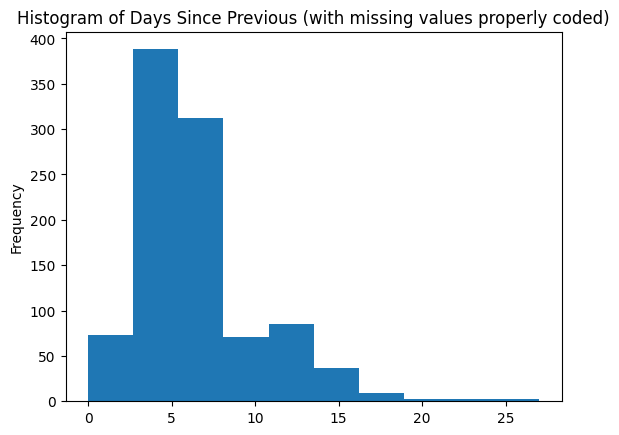

In [11]:
# remove xlabel from plot printout
from matplotlib import pyplot as plt

bt_2["days_since_previous"].plot(
    kind="hist",
    title="Histogram of Days Since Previous (with missing values properly coded)",
)
plt.show()

### Reexpress Categorical Field Values

- Modify Education with a numeric value to represent education levels
- Unknown values set to 0


In [12]:
bt_3 = bt_2.copy()
bt_3["education_numeric"] = bt_3["education"]
bt_3[["education_numeric", "education"]].head(3)

,education_numeric,education
0,basic.4y,basic.4y
1,high.school,high.school
2,unknown,unknown


### Plotting Education Numeric before new metrics applied


/var/folders/fw/_b7cq3g508x8khsq2tv5xykc0000gn/T/ipykernel_54186/2736800528.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bt_3


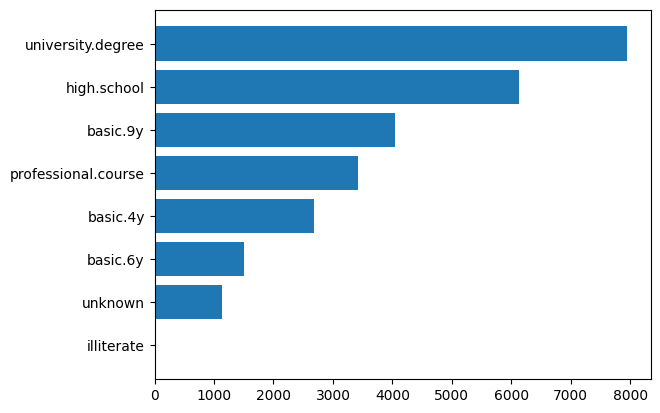

In [13]:
# plotting newly created education numeric
edu_num_bar_plot = (
    bt_3.groupby("education_numeric")["education_numeric"]
    .count()
    .to_frame(name="count")
    .reset_index(drop=False)
    .sort_values(by="count", ascending=True)
)

x = edu_num_bar_plot["education_numeric"]
y = edu_num_bar_plot["count"]
plt.barh(x, y)
plt.show()

### Replace numeric values for "Education Numeric" column


In [14]:
# replace education_numeric values dict
dict_edu = {
    "education_numeric": {
        "illiterate": 0,
        "basic.4y": 4,
        "basic.6y": 6,
        "basic.9y": 9,
        "high.school": 12,
        "profesional.course": 12,
        "university.degree": 16,
        "unknown": np.NaN,
    }
}
bt_4 = bt_3.copy()
bt_4.replace(dict_edu, inplace=True)
# bt_4['education_numeric']
bt_4.head()

/var/folders/fw/_b7cq3g508x8khsq2tv5xykc0000gn/T/ipykernel_54186/1615870336.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  bt_4.replace(dict_edu, inplace=True)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,education_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12


## Zscores

A z-score is like a report card grade for how far a particular number is from the average (mean) in a dataset. It uses a special grading scale in terms of "standard deviations."

Z-scores are helpful because they allow you to compare data from different datasets, even if they use different units

By converting everything to z-scores, you can see how far each number deviates from its own average regardless of the original scale.

- **Standard deviation**: Imagine how spread out your data is. A high standard deviation means the numbers are far from each other, while a low standard deviation means they're clustered tightly around the average.
- **Z-score of 0**: This means the number is exactly the average - it gets a perfect score!
- **Positive z-score (e.g., +1, +2)**: The number is higher than the average by a certain number of standard deviations. A higher positive score indicates a greater distance above the average.
- **Negative z-score (e.g., -1, -2)**: The number is lower than the average by a certain number of standard deviations. A more negative score shows it's further below the average.


### Standardize numeric fields ('age')


In [19]:
# standardize numeric fields

bt_5 = bt_4.copy()
bt_5["age_z"] = stats.zscore(bt_4["age"])
bt_5[["age_z", "age"]].head(5)

,age_z,age
0,1.539625,56
1,1.635778,57
2,0.097330,41
3,-1.441118,25
4,-1.056506,29


### Finding Outliers


In [21]:
# Finding Outliers
bt_5_outliers_sorted = bt_5.query("age_z > 3 | age_z < -3").sort_values(
    ["age_z"], ascending=False
)

bt_5_outliers_sorted.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,education_numeric,age_z
24840,91,retired,married,university.degree,no,no,yes,cellular,sep,wed,...,0,nonexistent,-3.4,92.379,-29.8,0.781,5017.0,no,16,4.904980
24833,91,retired,married,university.degree,no,yes,yes,cellular,sep,wed,...,2,failure,-3.4,92.379,-29.8,0.781,5017.0,no,16,4.904980
26520,89,retired,divorced,basic.4y,no,yes,no,cellular,sep,tue,...,0,nonexistent,-1.1,94.199,-37.5,0.881,4963.0,yes,4,4.712674
26015,89,retired,divorced,basic.4y,no,no,no,cellular,jun,mon,...,0,nonexistent,-1.7,94.055,-39.8,0.720,4991.0,yes,4,4.712674
23628,88,retired,divorced,basic.4y,no,yes,no,cellular,may,wed,...,0,nonexistent,-1.8,92.893,-46.2,1.270,5099.0,no,4,4.616521


### Identify Top 15 Outliers

- Outliers are above the +3 threshold for zscore


In [23]:
bt_5_outliers_sorted[["age", "marital"]].head(15)

,age,marital
24840,91,married
24833,91,married
26520,89,divorced
26015,89,divorced
23628,88,divorced
25098,88,divorced
26516,88,married
26509,88,married
18179,88,divorced
18191,88,divorced


### Examples of How to deal with missing data


In [5]:
test_df = pd.DataFrame(
    data={
        "col1": [1, 2, 3, 4, np.nan, np.nan, np.nan],
        "col2": [1, 2, 3, 4, 5, 6, np.nan],
        "col3": [np.nan, 3.2, 5.7, 11.8, np.nan, np.nan, np.nan],
        "col4": ["A", "A", "B", "C", np.nan, "A", np.nan],
        "col5": [2, 2, 2, np.nan, 3, 3, np.nan],
    }
)

##### Find the number of NaNs in a single column


In [6]:
# Find the number of NaNs in a single column
test_df.iloc[0].isna().sum()

1

##### Find the number of NaNs in all columns


In [12]:
test_df.isna().sum().to_frame()

,0
col1,3
col2,1
col3,4
col4,2
col5,2


##### Find the number of NaNs in each row


In [11]:
test_df.isnull().sum(axis=1).to_frame()

,0
0,1
1,0
2,0
3,1
4,3
5,2
6,5


##### Drop the last row of the data frame


In [10]:
test_df2 = test_df.copy()
test_df2 = test_df2.drop([6])
test_df2.head(3)

,col1,col2,col3,col4,col5
0,1.0,1.0,NaN,A,2.0
1,2.0,2.0,3.2,A,2.0
2,3.0,3.0,5.7,B,2.0


##### Replace the NaNs

- col1 with median
- col3 with mean
- col4 with the most common string
- col5 with mode


In [46]:
def replace_nans(df):
    fill_nans = {
        "col1": df["col1"].median(),
        "col3": df["col3"].mean(),
        "col4": df["col4"].mode()[0],  # most common string
        "col5": df["col5"].mode(),
    }
    return df.fillna(fill_nans)


df3 = replace_nans(test_df2.copy())

df3

,col1,col2,col3,col4,col5
0,1.0,1.0,6.9,A,2.0
1,2.0,2.0,3.2,A,2.0
2,3.0,3.0,5.7,B,2.0
3,4.0,4.0,11.8,C,NaN
4,2.5,5.0,6.9,A,3.0
5,2.5,6.0,6.9,A,3.0
